<a href="https://colab.research.google.com/github/milxss/Medium/blob/main/5_Ways_to_Use_TS_for_Your_Business/Seasonal_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Create an artificial restaurant income dataset
index = pd.date_range(start='2022-01-01', end='2023-12-31', freq='M')
restaurant_data = pd.Series(np.random.normal(100, 20, len(index)), index=index)
seasonal_pattern = np.array([0.8, 0.9, 1.2, 1.5, 1.7, 2, 2.1, 2, 1.7, 1.5, 1.2, 0.9])
restaurant_data = restaurant_data * seasonal_pattern.repeat(len(restaurant_data) // 12 + 1)[:len(restaurant_data)]

# Add a linear trend
trend = 10 * np.arange(len(restaurant_data))
restaurant_data = restaurant_data + trend

# Add some noise
noise = np.random.normal(0, 10, len(restaurant_data))
restaurant_data = restaurant_data + noise

# Save the dataset to a CSV file
restaurant_data.to_csv('restaurant.csv')


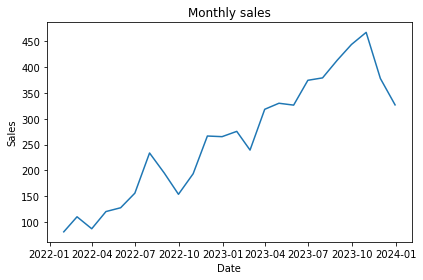

In [77]:
# Plot monthly sales
fig, ax = plt.subplots()
ax.plot(restaurant_data)
ax.set(title='Monthly sales', xlabel='Date', ylabel='Sales')
plt.tight_layout()
plt.show()

In [78]:
# Load the data
restaurant_data = pd.read_csv('/content/restaurant.csv', parse_dates=[0], index_col=[0])

In [79]:
restaurant_data.head()

,0
2022-01-31,80.802109
2022-02-28,109.939681
2022-03-31,86.760029
2022-04-30,120.071314
2022-05-31,127.447680


In [80]:
# Decompose the data
decomposition = seasonal_decompose(restaurant_data, model='additive', period=12)

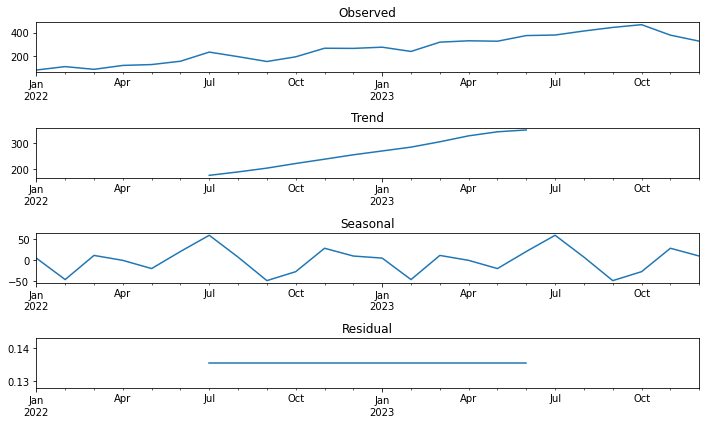

In [81]:
# Plot the results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,6))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()